<a href="https://colab.research.google.com/github/Llena-Anthony/Data-Science/blob/main/Data-Science/activities/activity-01-descriptive-stats%20/notebooks/Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Prelim Laboratory Activity 1: Descriptive Statistics (Measure of Central Tendency and Dispersion)**

##Import necessary libraries



In [65]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


###Load Mall_Customers.csv which was used in the Google Sheets

In [66]:
df = pd.read_csv("Mall_Customers.csv")
df.head() #.head() is a function that returns the first five rows in a dataset; function and df shows all the complete rows

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##Seperate Numeric and Categorical Columns


In [67]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_cols, categorical_cols

(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'],
 ['Gender'])

###Full Descriptive Stats Table

In [68]:
# Numeric dataframe
num_df = df[numeric_cols]

# Main descriptive stats
stats_table = num_df.agg(['mean', 'median', 'var', 'std', 'min', 'max']).T

# Extra measures
stats_table['range'] = stats_table['max'] - stats_table['min']
stats_table['mode'] = num_df.mode().iloc[0] # first mode per column
stats_table['midrange'] = (stats_table['min']+stats_table['max'])/2

# Arrange columns
stats_table = stats_table[['mean', 'median', 'mode', 'var', 'std', 'min', 'max', 'range', 'midrange']]

# Renmame for neat output
stats_table = stats_table.rename(columns={
    'mean': 'Mean',
    'median': 'Median',
    'mode': 'Mode',
    'var': 'Variance',
    'std': 'Standard Deviation',
    'min': 'Minimum',
    'max': 'Maximum',
    'range': 'Range',
    'midrange': 'Midrange'
})

stats_table

,Mean,Median,Mode,Variance,Standard Deviation,Minimum,Maximum,Range,Midrange
CustomerID,100.50,100.5,1.0,3350.000000,57.879185,1.0,200.0,199.0,100.5
Age,38.85,36.0,32.0,195.133166,13.969007,18.0,70.0,52.0,44.0
Annual Income (k$),60.56,61.5,54.0,689.835578,26.264721,15.0,137.0,122.0,76.0
Spending Score (1-100),50.20,50.0,42.0,666.854271,25.823522,1.0,99.0,98.0,50.0


###Visualizations


####Histogram of Customers'Age


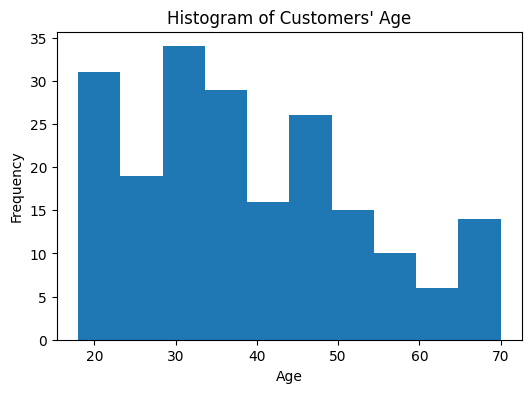

In [69]:
plt.figure(figsize=(6,4)) # Creates a new graph window; 6 = width of the graph in inches, 4 = height of the graph in inches; bigger numbers = bigger graphs
plt.hist(df["Age"], bins=10) # tells Python to draw a histogram; the data being plotted is the age column; splits the values into 10 groups(intervals)
plt.xlabel("Age") # Labels the x-axis or the ABSCISSA
plt.ylabel("Frequency") # Labels the y-axis or the ORDINATE
plt.title("Histogram of Customers' Age") # Gives the graph a title]
plt.show() # Displays the graph

####Bar Chart of Gender Distribution

<function matplotlib.pyplot.show(close=None, block=None)>

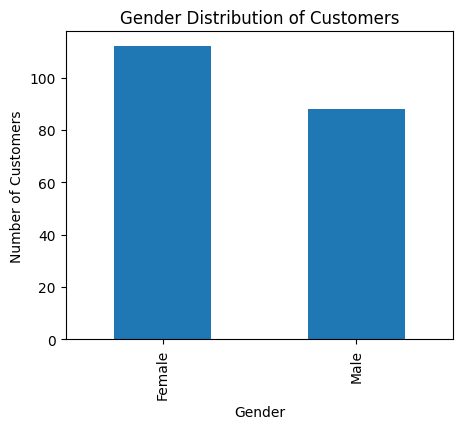

In [71]:
plt.figure(figsize=(5,4)) # Creates a new graph window
df["Gender"].value_counts().plot(kind="bar") # Counts how many times each gender appears
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.title("Gender Distribution of Customers")
plt.show

####Boxplot of Spending Score


Text(0.5, 1.0, 'Boxplot of Spending Score')

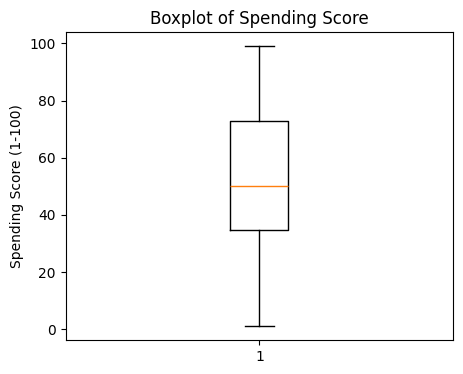

In [75]:
plt.figure(figsize=(5, 4))
plt.boxplot(df["Spending Score (1-100)"])
plt.ylabel("Spending Score (1-100)")
plt.title("Boxplot of Spending Score")

#### Scatter Plot: Annual Income vs Spending Score


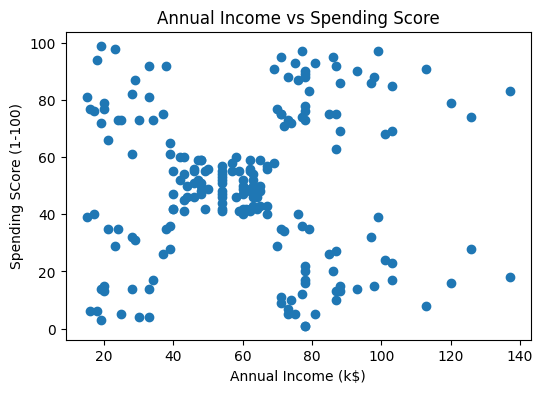

In [79]:
plt.figure(figsize=(6,4)) # Creates a new graph window

plt.scatter(
    df["Annual Income (k$)"],
    df["Spending Score (1-100)"]
)

plt.xlabel("Annual Income (k$)") # Labels the ABSCISSA
plt.ylabel("Spending SCore (1-100)") # Labels the ORDINATE
plt.title("Annual Income vs Spending Score")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

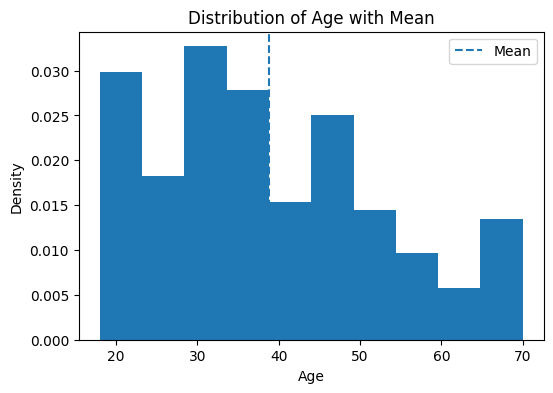

In [100]:
plt.figure(figsize=(6,4)) # Creates a new graph

plt.hist(df["Age"], bins=10, density=True) # density=True scales the histogram so it matches a probability curve

mean_age=df["Age"].mean()

plt.axvline(mean_age, linestyle="--", label="Mean") # Vertical dashed line showing the mean

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Distribution of Age with Mean")
plt.legend()

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

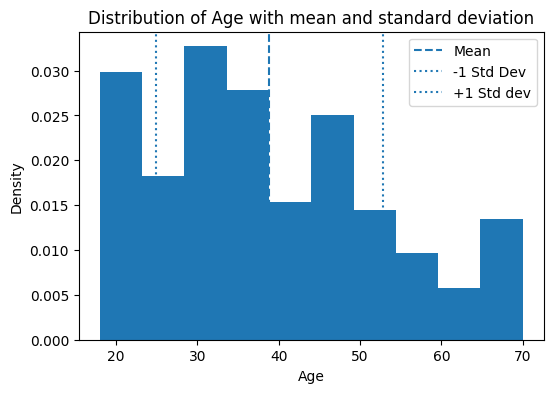

In [106]:
plt.figure(figsize=(6,4)) # Creates a new graph

plt.hist(df["Age"], bins=10, density=True)

mean_age = df["Age"].mean()
std_age = df["Age"].std()

plt.axvline(mean_age, linestyle="--", label="Mean")
plt.axvline(mean_age-std_age, linestyle=":", label="-1 Std Dev")
plt.axvline(mean_age+std_age, linestyle=":", label="+1 Std dev")

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Distribution of Age with mean and standard deviation")
plt.legend()
plt.show

/tmp/ipython-input-3039732180.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

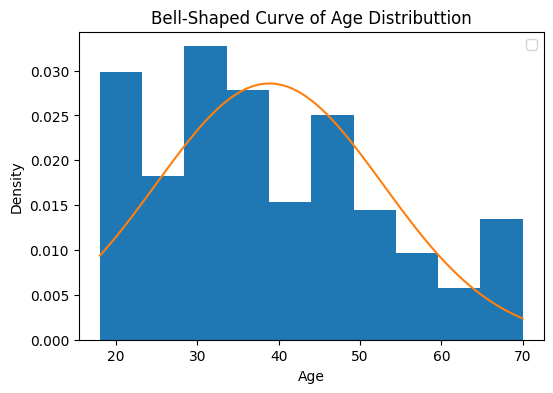

In [115]:
plt.figure(figsize=(6,4))

data = df["Age"]
mean = data.mean()
std = data.std()

x = np.linspace(data.min(), data.max(), 100)
y = norm.pdf(x, mean, std)

plt.hist(data, bins=10, density=True)
plt.plot(x,y)

plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Bell-Shaped Curve of Age Distributtion")
plt.legend()
plt.show